## Preliminary Data Analysis

### Data Acquisition and Loading

The Global AI Job Market & Salary Trends 2025 dataset is retrieved from Kaggle and can be found in the following link

https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data

The CSV of the data is also located under the raw data folder and may be accessed through the following

In [1]:
import pandas as pd
import os

# Path to raw data file
data_path = "../../data/raw/ai_job_dataset.csv"  

# Load dataset
data = pd.read_csv(data_path)

In [2]:
print("Shape of dataset:", data.shape)

Shape of dataset: (15000, 20)


In [3]:
print("\nData types:\n", data.dtypes)


Data types:
 job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
salary_local                int64
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object


In [4]:
print("\nFirst 5 rows:\n", data.head())


First 5 rows:
     job_id                 job_title  salary_usd salary_currency  \
0  AI00001            Data Scientist      219728             USD   
1  AI00002                Head of AI      230237             JPY   
2  AI00003             Data Engineer      128890             EUR   
3  AI00004  Computer Vision Engineer       96349             USD   
4  AI00005         Robotics Engineer       63065             EUR   

   salary_local experience_level employment_type company_location  \
0        219728               EX              PT           Sweden   
1      25326070               EX              PT            Japan   
2        109557               EX              CT          Germany   
3         96349               MI              FL          Finland   
4         53605               EN              FT           France   

  company_size employee_residence  remote_ratio  \
0            M             Sweden             0   
1            L              Japan            50   
2      

Then, we use the 'describe' mode to gain more information regarding the dataset's numerical variables. 

In [5]:
data.describe()

,salary_usd,salary_local,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,121991.938267,8.292366e+05,50.196667,6.365667,1500.852600,7.499540
std,63968.361846,3.425325e+06,40.844084,5.598551,574.724647,1.444202
min,16621.000000,1.662100e+04,0.000000,0.000000,500.000000,5.000000
25%,74978.500000,7.383075e+04,0.000000,2.000000,998.750000,6.300000
50%,107261.500000,1.090355e+05,50.000000,5.000000,1512.000000,7.500000
75%,155752.250000,1.673278e+05,100.000000,10.000000,1994.000000,8.800000
max,410273.000000,3.368541e+07,100.000000,19.000000,2499.000000,10.000000


In [6]:
data.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
salary_local              0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

To create a simulation that closely approximates real-world conditions, controlled missingness will be randomly assigned to specific variables.

In [8]:
import numpy as np
np.random.seed(42)

missingness = {
    "education_required": 0.09,   # 9% missing
    "years_experience": 0.11,     # 11% missing
    "employee_residence": 0.06,   # 6% missing
    "benefits_score": 0.04,       # 4% missing
    "required_skills": 0.075,     # 7.5% missing
    "posting_date": 0.0875,       # 8.75% missing
    "salary_usd": 0.02            # 2% missing
}

for col, frac in missingness.items():
    n_missing = int(len(data) * frac)
    missing_indices = np.random.choice(data.index, size=n_missing, replace=False)
    data.loc[missing_indices, col] = np.nan

In [9]:
data.isnull().sum()

job_id                       0
job_title                    0
salary_usd                 300
salary_currency              0
salary_local                 0
experience_level             0
employment_type              0
company_location             0
company_size                 0
employee_residence         900
remote_ratio                 0
required_skills           1125
education_required        1350
years_experience          1650
industry                     0
posting_date              1312
application_deadline         0
job_description_length       0
benefits_score             600
company_name                 0
dtype: int64

In [10]:
cat_cols = data.select_dtypes(include='object').columns

# Print value counts for each categorical column
for col in cat_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    print("\n")

--- job_id ---
job_id
AI00001    1
AI00002    1
AI00003    1
AI00004    1
AI00005    1
          ..
AI14996    1
AI14997    1
AI14998    1
AI14999    1
AI15000    1
Name: count, Length: 15000, dtype: int64


--- job_title ---
job_title
Machine Learning Engineer      824
Deep Learning Engineer         786
Computer Vision Engineer       780
AI Specialist                  774
Data Engineer                  769
Principal Data Scientist       768
AI Product Manager             764
Data Scientist                 763
Robotics Engineer              762
AI Architect                   758
Autonomous Systems Engineer    755
NLP Engineer                   741
Machine Learning Researcher    734
Data Analyst                   734
Research Scientist             731
AI Software Engineer           730
AI Research Scientist          724
AI Consultant                  713
Head of AI                     701
ML Ops Engineer                689
Name: count, dtype: int64


--- salary_currency ---
salary_curre

### Initial Exploratory Data Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
figures_dir = "../../figures"
os.makedirs(figures_dir, exist_ok=True)

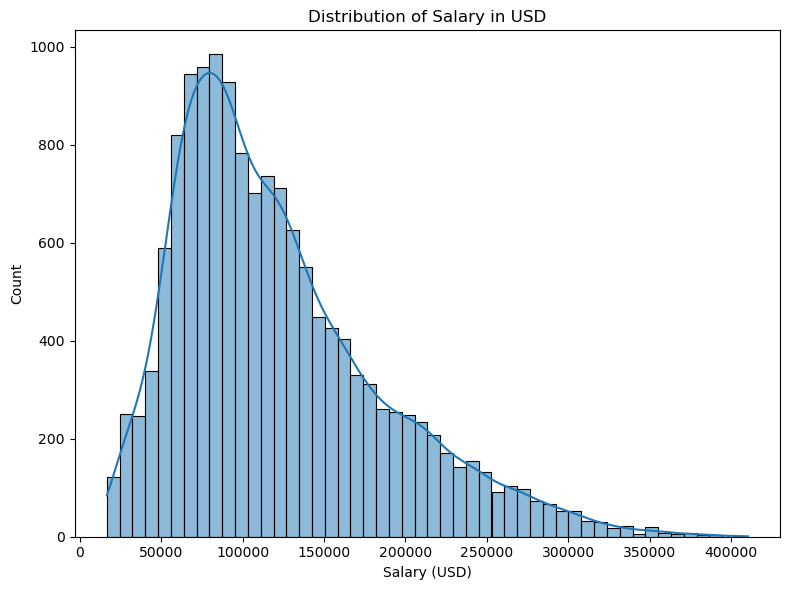

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data['salary_usd'], bins=50, kde=True)
plt.title("Distribution of Salary in USD")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "salary_distribution.png"))
plt.show()

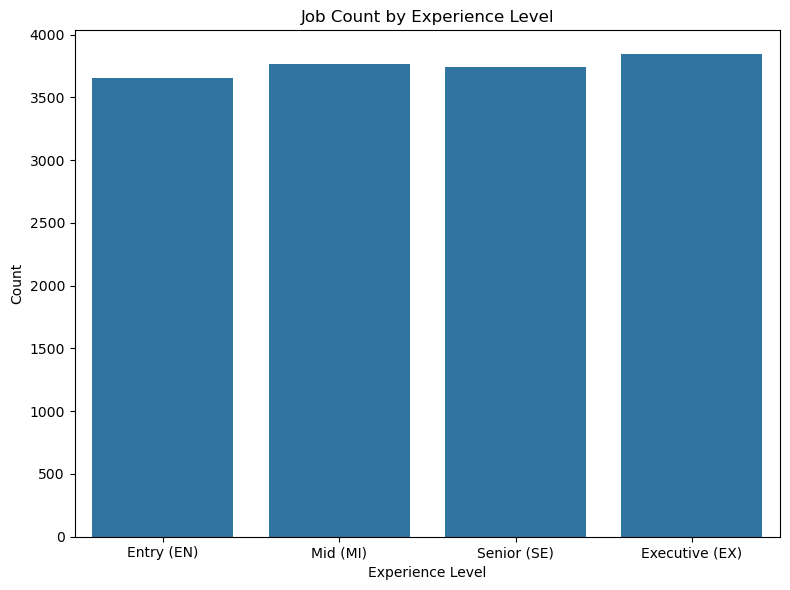

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='experience_level', data = data, order=['EN', 'MI', 'SE', 'EX'])
plt.title("Job Count by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Entry (EN)', 'Mid (MI)', 'Senior (SE)', 'Executive (EX)']
)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "experience_level_count.png"))
plt.show()

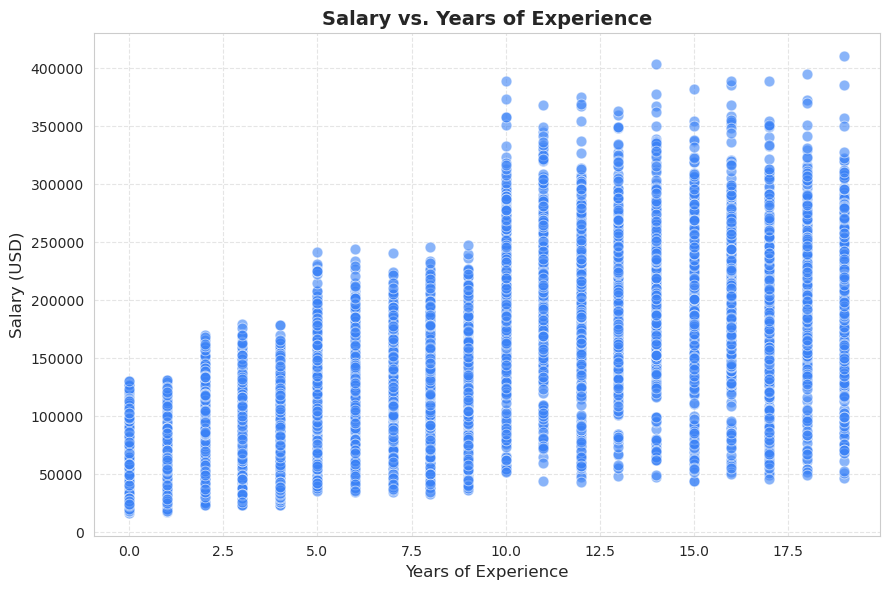

In [15]:
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")

sns.scatterplot(
    x='years_experience',
    y='salary_usd',
    data=data,
    color="#3b82f6",  
    alpha=0.6,        
    edgecolor="white", 
    s=60             
)

plt.title("Salary vs. Years of Experience", fontsize=14, fontweight='bold')
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "salary_vs_experience.png"), dpi=300, transparent=True)
plt.show()

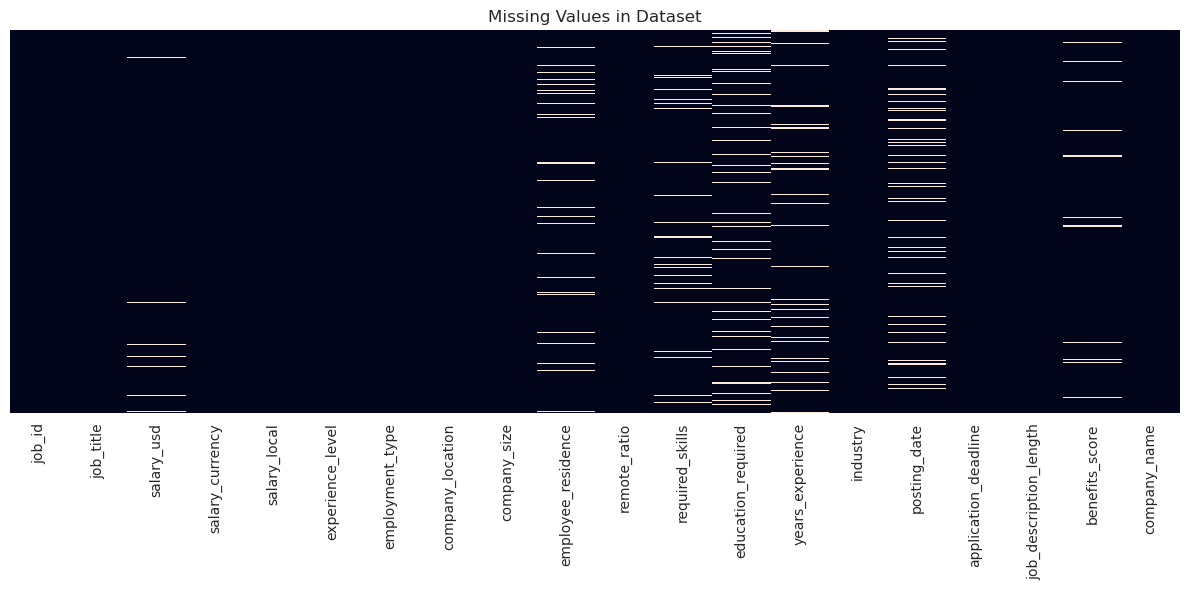

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "missing_values_heatmap.png"), dpi=300, transparent=True)
plt.show()

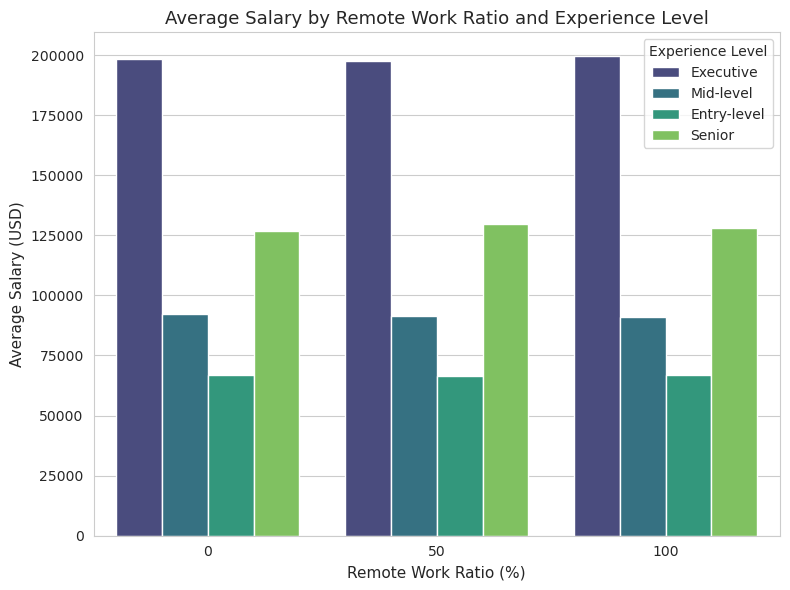

In [17]:
experience_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Executive'
}
data['experience_level_full'] = data['experience_level'].map(experience_map)

plt.figure(figsize=(8,6))
sns.barplot(
    x='remote_ratio',
    y='salary_usd',
    hue='experience_level_full',  # use the descriptive version
    data=data,
    errorbar=None,
    palette='viridis'
)

plt.title("Average Salary by Remote Work Ratio and Experience Level", fontsize=13)
plt.xlabel("Remote Work Ratio (%)", fontsize=11)
plt.ylabel("Average Salary (USD)", fontsize=11)
plt.legend(title="Experience Level")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "remote_ratio_vs_salary.png"), dpi=300, transparent=True)
plt.show()

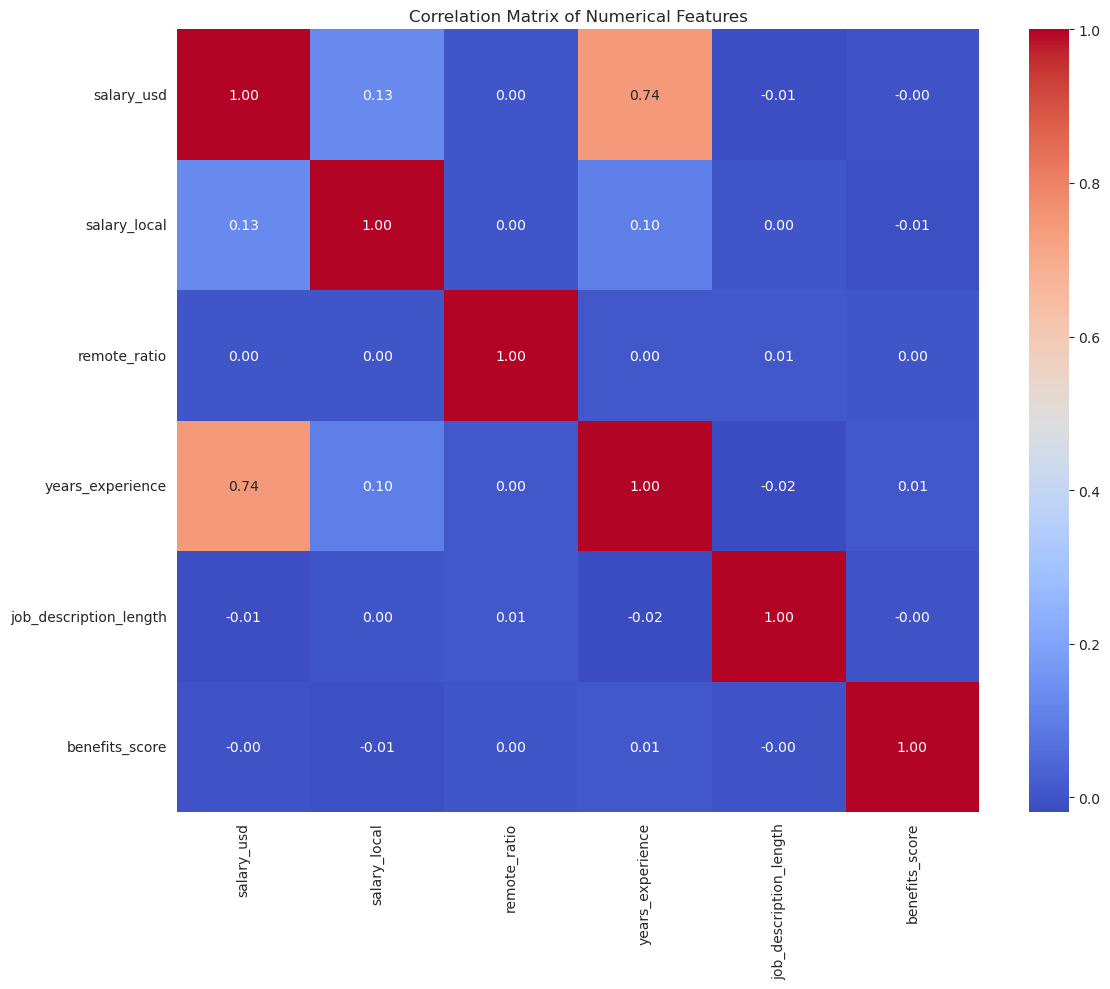

In [18]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "correlation_matrix.png"), dpi=300, transparent=True)
plt.show()

/tmp/ipykernel_895706/1836011632.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employee_residence', y='salary_usd', data=subset,


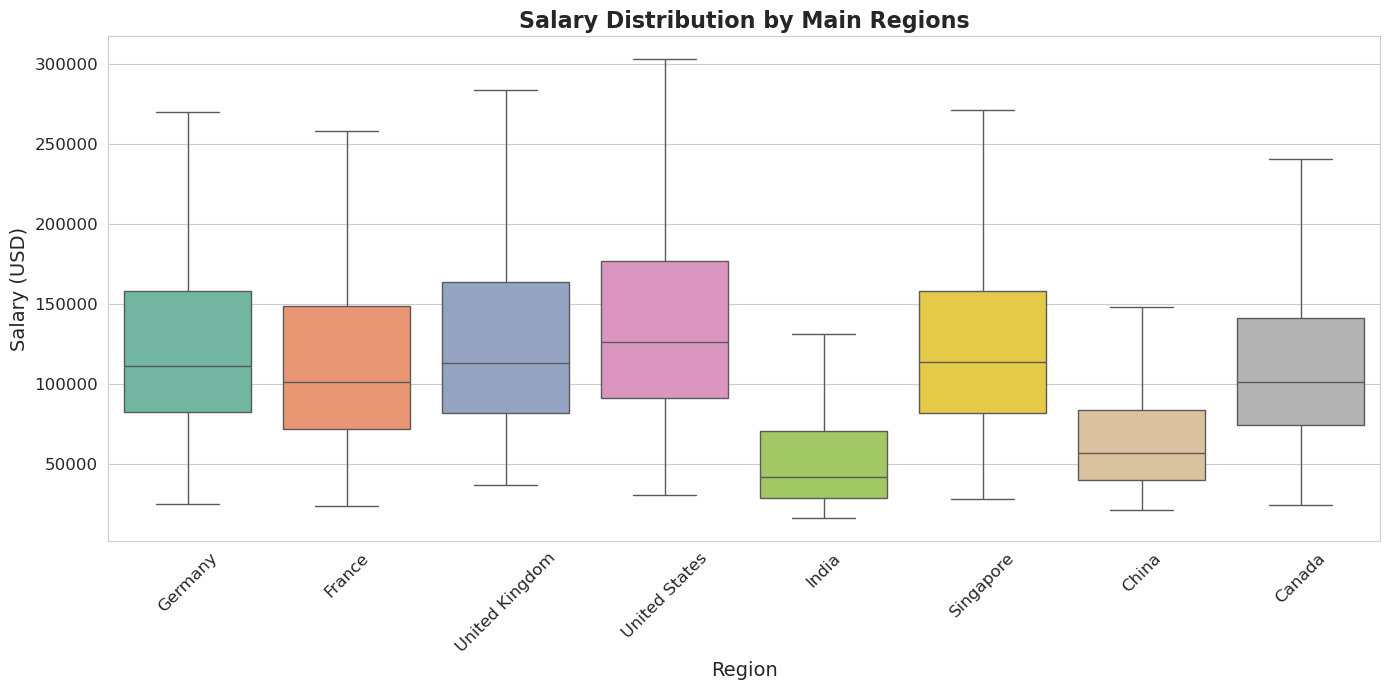

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select main regions
main_regions = ['United States', 'India', 'China', 'United Kingdom', 'Canada', 'Germany', 'France', 'Singapore']
subset = data[data['employee_residence'].isin(main_regions)]

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

# Boxplot with color palette
sns.boxplot(x='employee_residence', y='salary_usd', data=subset,
            palette="Set2", showfliers=False)

# Title and labels
plt.title('Salary Distribution by Main Regions', fontsize=16, weight='bold')
plt.ylabel('Salary (USD)', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing values in features or target
data_clean = data.dropna(subset=['salary_usd', 'years_experience', 'education_required', 'employee_residence'])

# Separate features (X) and target (y)
X = data_clean[['years_experience', 'education_required', 'employee_residence']]
y = data_clean['salary_usd']

# Encode categorical variables (simple one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

baseline = LinearRegression()
baseline.fit(X, y)

y_pred = baseline.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Baseline Linear Regression RMSE: {rmse:.2f}")

On average, the baseline model’s predicted salaries differ from the true salaries by about $35,804. This may be considered a wide value which can be improved by removing unnecessary features and/or using more advanced techniques.